In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from ga import ga, mutation_always, mutation_if
from string_search import GeneticAlgorithm

# Bit Strings


Mutatate if the new solution has a btter fit

In [2]:
l = 100
mu = 1 / l
solution, fits = ga(mutation_if, l, mu, 1500)

## Plots

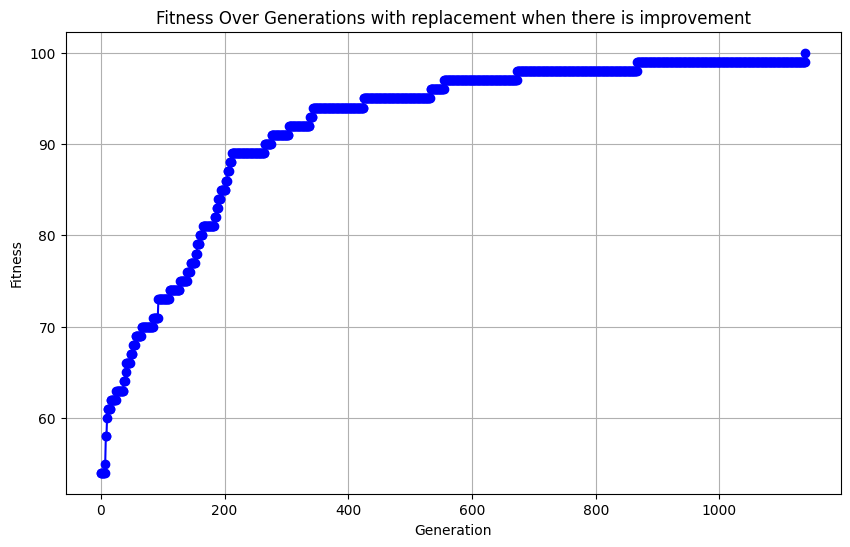

In [3]:
# Plotting the fitness over generations
plt.figure(figsize=(10, 6))
plt.plot(range(len(fits)), fits, marker="o", linestyle="-", color="b")
plt.title("Fitness Over Generations with replacement when there is improvement")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.grid(True)
plt.show()

In [4]:
l = 100
mu = 1 / l
solution, fits = ga(mutation_always, l, mu, 1500)

Max generations reached without finding the solution!


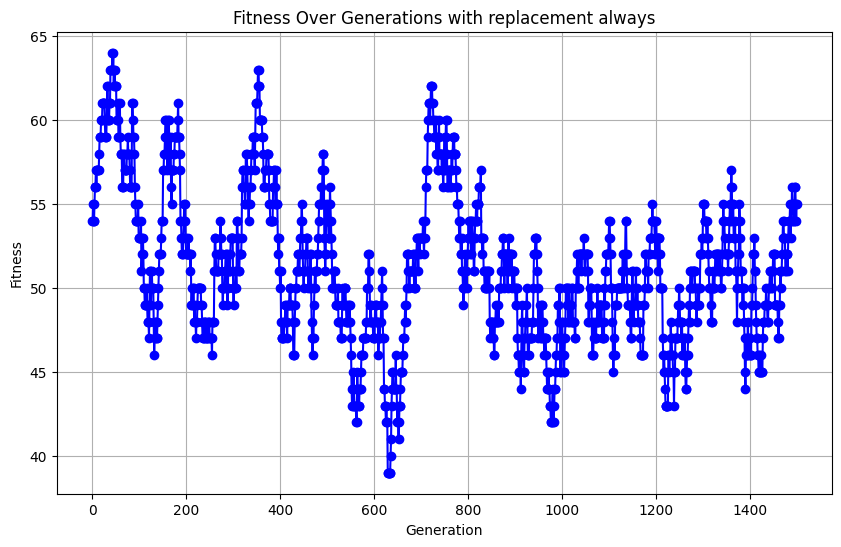

In [5]:
# Plotting the fitness over generations
plt.figure(figsize=(10, 6))
plt.plot(range(len(fits)), fits, marker="o", linestyle="-", color="b")
plt.title("Fitness Over Generations with replacement always")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.grid(True)
plt.show()

Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached with

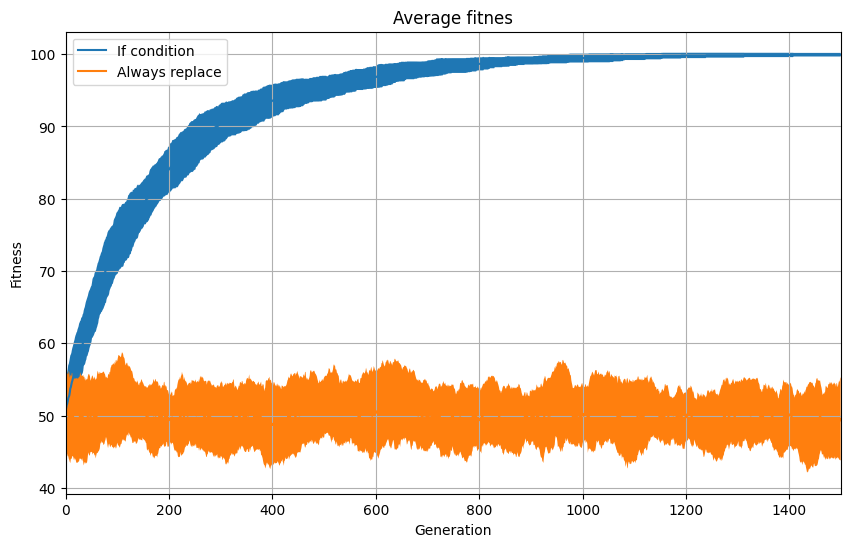

C:\Users\LDGer\AppData\Local\Temp\ipykernel_7760\312579192.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([final_if, final_always], labels=["If condition", "Always replace"])


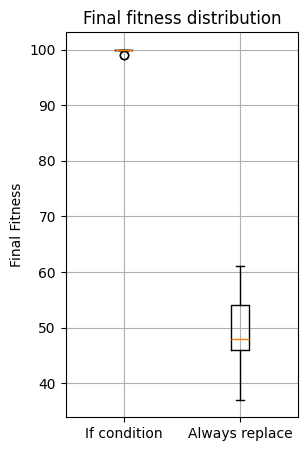

In [6]:
NUM_RUNS = 30
LENGTH = 100
MU = 1 / LENGTH
MAX_GENS = 1500

all_fits_if = []
all_fits_always = []

for run_index in range(NUM_RUNS):
    _, fits = ga(mutation_if, l=LENGTH, mu=MU, max_generations=MAX_GENS)
    if len(fits) < MAX_GENS: # need to pad it in case it finds a solution
        fits += [fits[-1]] * (MAX_GENS - len(fits))
    all_fits_if.append(fits)

for run_index in range(NUM_RUNS):
    _, fits = ga(mutation_always, l=LENGTH, mu=MU, max_generations=MAX_GENS)
    if len(fits) < MAX_GENS:
        fits += [fits[-1]] * (MAX_GENS - len(fits))
    all_fits_always.append(fits)

all_fits_if = np.array(all_fits_if)
all_fits_always = np.array(all_fits_always)

mean_if = np.mean(all_fits_if, axis=0)
std_if = np.std(all_fits_if, axis=0)

mean_always = np.mean(all_fits_always, axis=0)
std_always = np.std(all_fits_always, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(mean_if, label="If condition")
plt.fill_between(range(MAX_GENS), mean_if - std_if, mean_if + std_if)
plt.plot(mean_always, label="Always replace")
plt.fill_between(range(MAX_GENS), mean_always - std_always, mean_always + std_always)
plt.title("Average fitnes")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.xlim([0, MAX_GENS-1])
plt.legend()
plt.grid(True)
plt.show()

final_if = [run_fits[-1] for run_fits in all_fits_if]
final_always = [run_fits[-1] for run_fits in all_fits_always]
plt.figure(figsize=(8, 5))
plt.boxplot([final_if, final_always], labels=["If condition", "Always replace"])
plt.title("Final fitness distribution")
plt.ylabel("Final Fitness")
plt.grid(True)
plt.show()

# Genetic Algorithm with english letters

In [3]:
english_letters = [
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 
    'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 
    'u', 'v', 'w', 'x', 'y', 'z', 
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 
    'U', 'V', 'W', 'X', 'Y', 'Z'
]

interval = 10
target = "abcdefghijklmno"
l = len(target)
ga = GeneticAlgorithm(english_letters, target, 15, 200, 0.06, 2, generations_to_analyse=interval)
res, final_generation = ga.run()
fits = ga.get_avg_fitness()
hamming_distances = ga.get_hamming_distances()

Target reached in 50 generations!


Running the algorithm with $\mu = \frac{1}{L}$ and K=2, $\mu=0$ and $\mu = \frac{3}{L}$ for 10 times each

In [69]:
def run_experiment(mu: float, mu_text: str) -> None:
    t_finish = []

    for i in range(10):
        ga = GeneticAlgorithm(english_letters, target, l, 200, mu, 2, generations_to_analyse=interval)
        res, final_generation = ga.run()
        t_finish.append(final_generation)

        hamming_distances = ga.get_hamming_distances()
        # Generate the list of generations where measurements were taken
        generations = [i * interval for i in range(len(hamming_distances))]
        generations[-1] = final_generation # the last measurement is always for the final generation

        data.append(
            {
                "mu": mu_text,
                "replication": i,
                "generations": generations,
                "hamming_distances": hamming_distances,
                "final_generation": final_generation
            }
        )

    return t_finish

In [70]:
data = []
mus_1l = run_experiment(1/l, "1/L")
mus_0 = run_experiment(0, "0")
mus_3l = run_experiment(3/l, "3/L")

Target reached in 65 generations!
Target reached in 37 generations!
Target reached in 41 generations!
Target reached in 59 generations!
Target reached in 81 generations!
Target reached in 47 generations!
Target reached in 63 generations!
Target reached in 47 generations!
Target reached in 49 generations!


## Visualitations

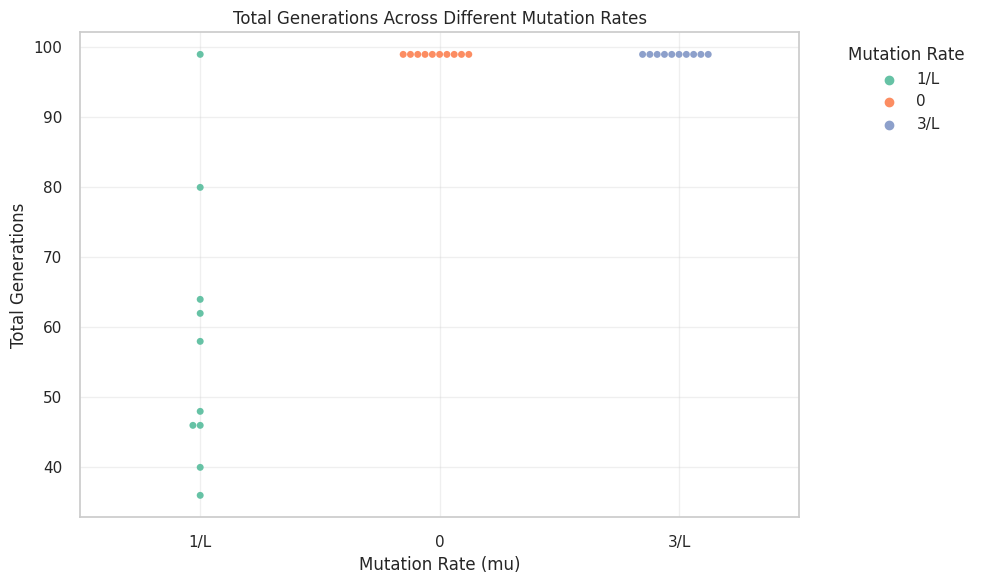

In [71]:
total_gens = mus_1l + mus_0 + mus_3l
mu_values = ["1/L"] * 10 + ["0"] * 10 + ["3/L"]*10

# Create a DataFrame
t_finish_df = pd.DataFrame({
    'Mutation Rate (mu)': mu_values,
    'Total Generations': total_gens
})

# Set the style for better visual appeal
sns.set(style="whitegrid", palette="Set2")

# Create the swarm plot
plt.figure(figsize=(10, 6))
sns_swarm = sns.swarmplot(x='Mutation Rate (mu)', y='Total Generations', hue='Mutation Rate (mu)', data=t_finish_df)

# Enhance the plot
plt.title('Total Generations Across Different Mutation Rates')
plt.xlabel('Mutation Rate (mu)')
plt.ylabel('Total Generations')
plt.grid(True, alpha=0.3)

# Adjust the legend if necessary
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:3], labels[:3], title='Mutation Rate', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [72]:
df = pd.DataFrame(data)
df.head(15)

,mu,replication,generations,hamming_distances,final_generation
0,1/L,0,"[0, 10, 20, 30, 40, 50, 60, 64]","[14.54938775510204, 12.625306122448979, 10.011...",64
1,1/L,1,"[0, 10, 20, 30, 36]","[14.671020408163265, 12.394285714285715, 10.06...",36
2,1/L,2,"[0, 10, 20, 30, 40]","[14.529795918367347, 13.03591836734694, 10.234...",40
3,1/L,3,"[0, 10, 20, 30, 40, 50, 58]","[14.650612244897959, 12.180408163265307, 9.767...",58
4,1/L,4,"[0, 10, 20, 30, 40, 50, 60, 70, 80]","[14.622857142857143, 12.653061224489797, 9.591...",80
5,1/L,5,"[0, 10, 20, 30, 40, 46]","[14.600816326530612, 12.674285714285714, 9.746...",46
6,1/L,6,"[0, 10, 20, 30, 40, 50, 60, 62]","[14.663673469387755, 12.413061224489796, 9.891...",62
7,1/L,7,"[0, 10, 20, 30, 40, 46]","[14.630204081632654, 12.711836734693877, 10.04...",46
8,1/L,8,"[0, 10, 20, 30, 40, 48]","[14.670204081632653, 12.25469387755102, 10.403...",48
9,1/L,9,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]","[14.66530612244898, 12.582857142857144, 10.065...",99


In [73]:
df.iloc[0]["generations"]

[0, 10, 20, 30, 40, 50, 60, 64]

In [74]:
len(df.iloc[0]["hamming_distances"])


8

In [56]:
df.columns

Index(['mu', 'replication', 'generations', 'hamming_distances',
       'final_generation'],
      dtype='object')

/tmp/ipykernel_7777/2287865422.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


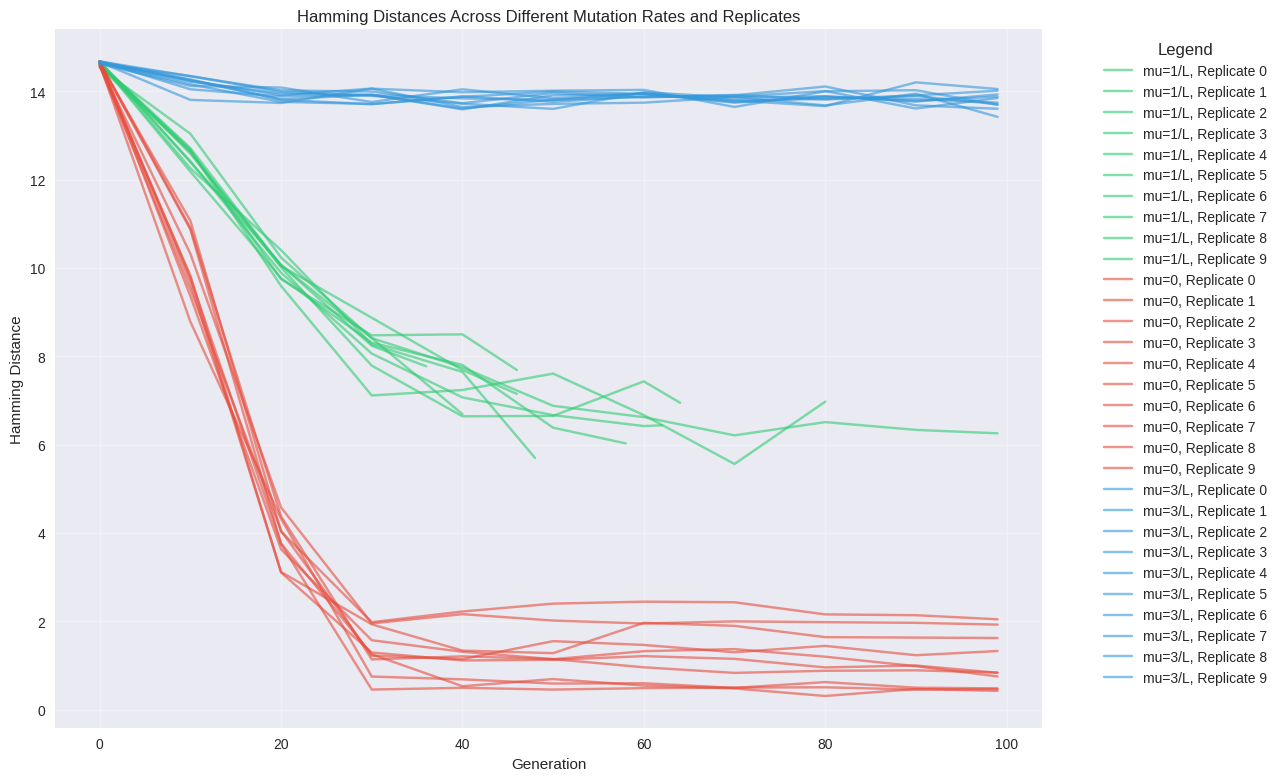

In [77]:
# Set the style for better visual appeal
plt.style.use('seaborn')
sns.set_palette("husl")

plt.figure(figsize=(13, 8))

colors = {'1/L': '#2ecc71', '0': '#e74c3c', '3/L': '#3498db'}

# Plot each replicate
for idx, row in df.iterrows():
    mu = row['mu']
    replication = row['replication']
    gens = row['generations']
    hms = row['hamming_distances']
    
    # Plot the hamming distances for this replicate
    plt.plot(gens, hms, 
             label=f'mu={mu}, Replicate {replication}', 
             color=colors.get(mu, 'grey'), 
             alpha=0.6  # Add transparency to distinguish overlapping lines
             )

# Customize the plot
plt.title('Hamming Distances Across Different Mutation Rates and Replicates')
plt.xlabel('Generation')
plt.ylabel('Hamming Distance')
plt.grid(True, alpha=0.3)

# Add a legend
handles, labels = plt.gca().get_legend_handles_labels()
# Remove duplicate entries in the legend
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),
          bbox_to_anchor=(1.05, 1), loc='upper left', title='Legend')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Target reached in 44 generations!
Target reached in 33 generations!
Target reached in 40 generations!


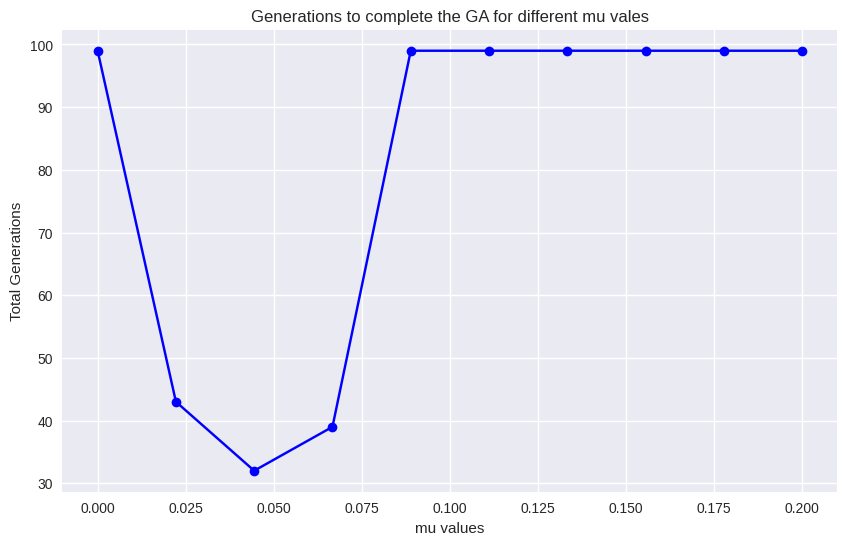

In [87]:
mus = []
t_finishes = []
k = 2
for mu in np.linspace(0.0, 0.2, num=10):
    ga = GeneticAlgorithm(english_letters, target, l, 200, mu, k, generations_to_analyse=interval)
    res, final_generation = ga.run()
    mus.append(mu)
    t_finishes.append(final_generation)

# Plotting the fitness over generations
plt.figure(figsize=(10, 6))
plt.plot(mus, t_finishes, marker="o", linestyle="-", color="b")
plt.title("Generations to complete the GA for different mu vales")
plt.xlabel("mu values")
plt.ylabel("Total Generations")
plt.grid(True)
plt.show()

Target reached in 25 generations!
Target reached in 16 generations!
Target reached in 22 generations!
Target reached in 24 generations!
Target reached in 19 generations!
Target reached in 72 generations!
Target reached in 92 generations!
Target reached in 53 generations!


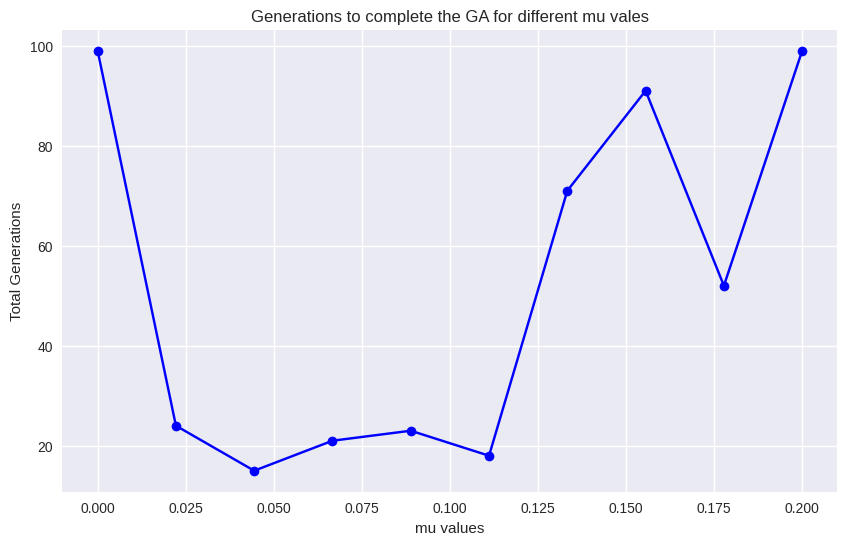

In [88]:
mus = []
t_finishes = []
k = 5
for mu in np.linspace(0.0, 0.2, num=10):
    ga = GeneticAlgorithm(english_letters, target, l, 200, mu, k, generations_to_analyse=interval)
    res, final_generation = ga.run()
    mus.append(mu)
    t_finishes.append(final_generation)

# Plotting the fitness over generations
plt.figure(figsize=(10, 6))
plt.plot(mus, t_finishes, marker="o", linestyle="-", color="b")
plt.title("Generations to complete the GA for different mu vales")
plt.xlabel("mu values")
plt.ylabel("Total Generations")
plt.grid(True)
plt.show()